Details of the columns:
● 'id' - unique identifier of the match
● 'season' - match season  
● 'city' - City where the match was played
● 'date' - Date of the match
● 'match_type' - Type of the match in the league
● 'player_of_match' - Player of the match
● 'venue' - Venue of the match
● 'team1' - team 1  
● 'team2' - team 2
● 'toss_winner' - Team who won the toss
● 'toss_decision' - decision after winning the toss
● 'winner' - winner of the match
● 'result' - result of the match. Whether the winning team won the match by runs or wickets
● 'result_margin' -  margin with which the match was won
● 'target_runs' - target set by the team who batted in innings 1
● 'target_overs' - overs in which the target was achieved
● 'super_over' - whether super over was pllayed in the match
● 'method'
●  'umpire1' - First umpire of the match

● 'umpire2' - second umpire of the match

EASY


Objective: Understand the structure, trends, and basic aggregations.




1. How many total matches have been played in IPL history?

In [1]:
import pandas as pd

df = pd.read_csv('/content/matches (1).csv')

num_matches = len(df)

print(f"Total number of matches played in IPL history: {num_matches}")

Total number of matches played in IPL history: 1095


2. In which city have the most matches been played?


In [2]:
city_counts = df['city'].value_counts()

most_matches_city = city_counts.idxmax()
num_matches_in_city = city_counts.max()

print(f"The city where the most matches have been played is {most_matches_city} with {num_matches_in_city} matches.")

The city where the most matches have been played is Mumbai with 173 matches.


3. What are the top 5 most common venues?


In [3]:
venue_counts = df['venue'].value_counts()

top_5_venues = venue_counts.head(5)

print("Top 5 most common venues:")
print(top_5_venues)

Top 5 most common venues:
venue
Eden Gardens                                 77
Wankhede Stadium                             73
M Chinnaswamy Stadium                        65
Feroz Shah Kotla                             60
Rajiv Gandhi International Stadium, Uppal    49
Name: count, dtype: int64


4. Which seasons had the highest number of matches?

In [4]:
season_counts = df['season'].value_counts()

highest_match_seasons = season_counts[season_counts == season_counts.max()]

print("Seasons with the highest number of matches:")
print(highest_match_seasons)

Seasons with the highest number of matches:
season
2013    76
Name: count, dtype: int64


5. How many matches went to a super over?

In [5]:
super_over_matches = df[df['super_over'] == 'Y']

num_super_over_matches = len(super_over_matches)

print(f"Number of matches that went to a super over: {num_super_over_matches}")

Number of matches that went to a super over: 14


6. What are the different types of results recorded?

In [6]:
unique_results = df['result'].unique()

print("Different types of results recorded:")
print(unique_results)

Different types of results recorded:
['runs' 'wickets' 'tie' 'no result']


7. Which team has won the most matches overall?

In [7]:
winner_counts = df['winner'].value_counts()

most_wins_team = winner_counts.idxmax()
num_wins = winner_counts.max()

print(f"The team with the most wins overall is {most_wins_team} with {num_wins} wins.")

The team with the most wins overall is Mumbai Indians with 144 wins.


8. Which player has won the most Player of the Match awards?

In [9]:
player_of_match_counts = df['player_of_match'].value_counts()

#most_player_of_match = player_of_match_counts.idxmax()
num_player_of_match_awards = player_of_match_counts.max()

print(f"The player with the most Player of the Match awards is {most_player_of_match} with {num_player_of_match_awards} awards.")

The player with the most Player of the Match awards is AB de Villiers with 25 awards.


9. How many matches were won by chasing vs defending?

In [10]:
chasing_wins = df[df['result'] == 'wickets'].shape[0]
defending_wins = df[df['result'] == 'runs'].shape[0]

print(f"Number of matches won by chasing: {chasing_wins}")
print(f"Number of matches won by defending: {defending_wins}")

Number of matches won by chasing: 578
Number of matches won by defending: 498


10. What is the average winning margin in runs vs wickets?

In [11]:
avg_margin_runs = df[df['result'] == 'runs']['result_margin'].mean()
avg_margin_wickets = df[df['result'] == 'wickets']['result_margin'].mean()

print(f"Average winning margin in runs: {avg_margin_runs:.2f}")
print(f"Average winning margin in wickets: {avg_margin_wickets:.2f}")

Average winning margin in runs: 30.10
Average winning margin in wickets: 6.19


INTERMEDIATE  

Objective: Grouped analysis, trends over time, categorical distributions.

1. Toss vs Match Winner: Does winning the toss increase the chances of winning the
match?

In [12]:
toss_match_winner = df[df['toss_winner'] == df['winner']]

num_toss_match_winner = len(toss_match_winner)
total_matches = len(df)

win_percentage_toss_winner = (num_toss_match_winner / total_matches) * 100

print(f"Number of matches where toss winner was also the match winner: {num_toss_match_winner}")
print(f"Total number of matches: {total_matches}")
print(f"Percentage of matches where toss winner was also the match winner: {win_percentage_toss_winner:.2f}%")

Number of matches where toss winner was also the match winner: 554
Total number of matches: 1095
Percentage of matches where toss winner was also the match winner: 50.59%


2. Which team has the highest win % in each season?

In [13]:
# Calculate the total number of matches played by each team in each season
matches_played = df.groupby('season')['team1'].value_counts().add(
    df.groupby('season')['team2'].value_counts(), fill_value=0
).astype(int)

# Calculate the number of matches won by each team in each season
matches_won = df.groupby('season')['winner'].value_counts()

# Calculate the win percentage for each team in each season
win_percentage = (matches_won / matches_played) * 100

# Find the team with the highest win percentage in each season
highest_win_percentage_each_season = win_percentage.groupby('season').idxmax()
highest_win_percentage_value_each_season = win_percentage.groupby('season').max()

print("Team with the highest win percentage in each season:")
for season in highest_win_percentage_each_season.index:
    team = highest_win_percentage_each_season[season]
    percentage = highest_win_percentage_value_each_season[season]
    print(f"Season {season}: {team} with {percentage:.2f}% win percentage")

Team with the highest win percentage in each season:
Season 2007/08: ('2007/08', 'Rajasthan Royals', 'Deccan Chargers', 'Kolkata Knight Riders') with 100.00% win percentage
Season 2009: ('2009', 'Delhi Daredevils', 'Mumbai Indians', 'Chennai Super Kings') with 250.00% win percentage
Season 2009/10: ('2009/10', 'Mumbai Indians', 'Mumbai Indians', 'Chennai Super Kings') with 91.67% win percentage
Season 2011: ('2011', 'Chennai Super Kings', 'Deccan Chargers', 'Rajasthan Royals') with 84.62% win percentage
Season 2012: ('2012', 'Kolkata Knight Riders', 'Royal Challengers Bangalore', 'Deccan Chargers') with 85.71% win percentage
Season 2013: ('2013', 'Mumbai Indians', 'Delhi Daredevils', 'Chennai Super Kings') with 81.25% win percentage
Season 2014: ('2014', 'Kings XI Punjab', 'Delhi Daredevils', 'Chennai Super Kings') with 85.71% win percentage
Season 2015: ('2015', 'Chennai Super Kings', 'Kolkata Knight Riders', 'Delhi Daredevils') with 76.92% win percentage
Season 2016: ('2016', 'Sunris

3. Which team has the best record at each major venue?

In [14]:
# Group by venue and winner to count wins at each venue for each team
venue_wins = df.groupby('venue')['winner'].value_counts().unstack(fill_value=0)

# Find the team with the maximum wins at each venue
best_record_at_venue = venue_wins.idxmax(axis=1)
most_wins_at_venue = venue_wins.max(axis=1)

print("Team with the best record at each venue:")
for venue in best_record_at_venue.index:
    team = best_record_at_venue[venue]
    wins = most_wins_at_venue[venue]
    print(f"Venue: {venue}: {team} with {wins} wins")

Team with the best record at each venue:
Venue: Arun Jaitley Stadium: Delhi Capitals with 4 wins
Venue: Arun Jaitley Stadium, Delhi: Delhi Capitals with 6 wins
Venue: Barabati Stadium: Deccan Chargers with 3 wins
Venue: Barsapara Cricket Stadium, Guwahati: Punjab Kings with 2 wins
Venue: Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow: Lucknow Super Giants with 7 wins
Venue: Brabourne Stadium: Mumbai Indians with 5 wins
Venue: Brabourne Stadium, Mumbai: Delhi Capitals with 4 wins
Venue: Buffalo Park: Chennai Super Kings with 1 wins
Venue: De Beers Diamond Oval: Chennai Super Kings with 1 wins
Venue: Dr DY Patil Sports Academy: Mumbai Indians with 5 wins
Venue: Dr DY Patil Sports Academy, Mumbai: Chennai Super Kings with 3 wins
Venue: Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium: Sunrisers Hyderabad with 3 wins
Venue: Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam: Delhi Capitals with 1 wins
Venue: Dubai International Cricket Stadium: Che

4. Are there any cities/venues where chasing is significantly better than defending?

In [15]:
# Filter matches won by chasing ('wickets') and defending ('runs')
chasing_matches = df[df['result'] == 'wickets']
defending_matches = df[df['result'] == 'runs']

# Count chasing and defending wins by city
chasing_wins_by_city = chasing_matches['city'].value_counts()
defending_wins_by_city = defending_matches['city'].value_counts()

# Count chasing and defending wins by venue
chasing_wins_by_venue = chasing_matches['venue'].value_counts()
defending_wins_by_venue = defending_matches['venue'].value_counts()

# Combine the counts for comparison
city_comparison = pd.DataFrame({
    'Chasing Wins': chasing_wins_by_city,
    'Defending Wins': defending_wins_by_city
}).fillna(0).astype(int)

venue_comparison = pd.DataFrame({
    'Chasing Wins': chasing_wins_by_venue,
    'Defending Wins': defending_wins_by_venue
}).fillna(0).astype(int)

# Identify cities where chasing wins are significantly higher (e.g., more than twice the defending wins and at least 10 matches played)
significant_chasing_cities = city_comparison[
    (city_comparison['Chasing Wins'] > 2 * city_comparison['Defending Wins']) &
    (city_comparison['Chasing Wins'] + city_comparison['Defending Wins'] >= 10)
]

# Identify venues where chasing wins are significantly higher (e.g., more than twice the defending wins and at least 10 matches played)
significant_chasing_venues = venue_comparison[
    (venue_comparison['Chasing Wins'] > 2 * venue_comparison['Defending Wins']) &
    (venue_comparison['Chasing Wins'] + venue_comparison['Defending Wins'] >= 10)
]


print("Cities where chasing is significantly better than defending:")
if not significant_chasing_cities.empty:
    display(significant_chasing_cities)
else:
    print("No cities found where chasing is significantly better than defending (based on criteria).")

print("\nVenues where chasing is significantly better than defending:")
if not significant_chasing_venues.empty:
    display(significant_chasing_venues)
else:
    print("No venues found where chasing is significantly better than defending (based on criteria).")

Cities where chasing is significantly better than defending:


,Chasing Wins,Defending Wins
city,,
Dubai,9,4
Sharjah,7,3



Venues where chasing is significantly better than defending:


,Chasing Wins,Defending Wins
venue,,
Sawai Mansingh Stadium,32,15


5. What is the most common toss decision, and how has it changed over time?

In [16]:
# Most common toss decision overall
most_common_toss_decision = df['toss_decision'].mode()[0]
print(f"The most common toss decision overall is: {most_common_toss_decision}")

# How toss decision has changed over time (by season)
toss_decision_by_season = df.groupby('season')['toss_decision'].value_counts(normalize=True).unstack().fillna(0)

print("\nToss decision percentage by season:")
display(toss_decision_by_season)

The most common toss decision overall is: field

Toss decision percentage by season:


toss_decision,bat,field
season,,
2007/08,0.448276,0.551724
2009,0.614035,0.385965
2009/10,0.650000,0.350000
2011,0.342466,0.657534
2012,0.500000,0.500000
2013,0.592105,0.407895
2014,0.316667,0.683333
2015,0.423729,0.576271
2016,0.183333,0.816667


6. Who are the top 10 most consistent players (based on number of matches and PoM
awards)?

In [17]:
# Count the number of matches played by each player
# A player is in team1 or team2
team1_players = df.groupby('id')['team1'].unique().apply(lambda x: x[0])
team2_players = df.groupby('id')['team2'].unique().apply(lambda x: x[0])

all_players_in_matches = pd.concat([team1_players, team2_players]).reset_index(drop=True)

# Note: This approach counts the number of matches a player's team played, not necessarily the number of matches the player themselves played.
# A more accurate approach would require player-level data within each match, which is not available in this dataset.
# For this analysis, we will consider consistency based on Player of the Match awards and assume players with more PoM awards have played a significant number of matches.

# Count Player of the Match awards for each player (already calculated in a previous cell)
# player_of_match_counts = df['player_of_match'].value_counts()

# For a simple measure of consistency, we can consider players with a high number of PoM awards.
# A more sophisticated approach would involve normalizing by the number of matches played,
# but that requires player-specific match data which is not in this dataset.

# Display the top 10 players with the most Player of the Match awards
print("Top 10 players with the most Player of the Match awards (as a proxy for consistency):")
display(player_of_match_counts.head(10))

Top 10 players with the most Player of the Match awards (as a proxy for consistency):


,count
player_of_match,
AB de Villiers,25
CH Gayle,22
RG Sharma,19
V Kohli,18
DA Warner,18
MS Dhoni,17
YK Pathan,16
RA Jadeja,16
SR Watson,16


7. Which match had the highest winning margin (runs or wickets)?

In [18]:
# Find the match with the maximum result margin
max_margin_match = df.loc[df['result_margin'].idxmax()]

print("Match with the highest winning margin:")
display(max_margin_match)

Match with the highest winning margin:


,620
id,1082635
season,2017
city,Delhi
date,2017-05-06
match_type,League
player_of_match,LMP Simmons
venue,Feroz Shah Kotla
team1,Delhi Daredevils
team2,Mumbai Indians
toss_winner,Delhi Daredevils


8. Has the number of matches with Super Overs increased or decreased over time?

In [19]:
# Filter for matches that went to a super over
super_over_matches = df[df['super_over'] == 'Y']

# Count the number of super over matches per season
super_over_counts_by_season = super_over_matches['season'].value_counts().sort_index()

print("Number of Super Over matches by season:")
display(super_over_counts_by_season)

# Optional: Plotting the trend
# import matplotlib.pyplot as plt
#
# plt.figure(figsize=(10, 6))
# super_over_counts_by_season.plot(kind='bar')
# plt.title('Number of Super Over Matches Over Time')
# plt.xlabel('Season')
# plt.ylabel('Number of Super Overs')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

Number of Super Over matches by season:


,count
season,
2009,1
2009/10,1
2013,2
2014,1
2015,1
2017,1
2019,2
2020/21,4
2021,1


9. What is the trend of matches decided by less than 10 runs or less than 2 wickets?

In [20]:
# Filter for matches decided by less than 10 runs or less than 2 wickets
close_matches = df[
    ((df['result'] == 'runs') & (df['result_margin'] < 10)) |
    ((df['result'] == 'wickets') & (df['result_margin'] < 2))
]

# Count the number of close matches per season
close_match_counts_by_season = close_matches['season'].value_counts().sort_index()

print("Number of close matches (decided by <10 runs or <2 wickets) by season:")
display(close_match_counts_by_season)

# Optional: Plotting the trend
# import matplotlib.pyplot as plt
#
# plt.figure(figsize=(10, 6))
# close_match_counts_by_season.plot(kind='bar')
# plt.title('Trend of Close Matches Over Time')
# plt.xlabel('Season')
# plt.ylabel('Number of Close Matches')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

Number of close matches (decided by <10 runs or <2 wickets) by season:


,count
season,
2007/08,7
2009,7
2009/10,3
2011,4
2012,6
2013,8
2014,3
2015,10
2016,6


10. Is there any seasonal pattern in toss decisions (e.g., day/night, pitch factor)?

In [21]:
toss_decision_by_season = df.groupby('season')['toss_decision'].value_counts(normalize=True).unstack().fillna(0)

print("Toss decision percentage by season:")
display(toss_decision_by_season)

# While this data doesn't directly include day/night or pitch information,
# the seasonal trend can reveal if strategies related to these factors have changed over time.
# For example, a strong trend towards fielding in later seasons might suggest
# that pitches are becoming more conducive to chasing, or that dew factors in night matches
# are influencing decisions.

Toss decision percentage by season:


toss_decision,bat,field
season,,
2007/08,0.448276,0.551724
2009,0.614035,0.385965
2009/10,0.650000,0.350000
2011,0.342466,0.657534
2012,0.500000,0.500000
2013,0.592105,0.407895
2014,0.316667,0.683333
2015,0.423729,0.576271
2016,0.183333,0.816667


ADVANCED

Objective: Comparative insights, conditional patterns, time series/grouped trends.

1. Build a timeline of IPL champions from 2008 to the latest season. Visualize it.

IPL Champions Timeline:


,season,winner
0,2007/08,Rajasthan Royals
1,2009,Deccan Chargers
2,2009/10,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


/tmp/ipython-input-3578332250.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='winner', data=champions_timeline, palette='viridis')


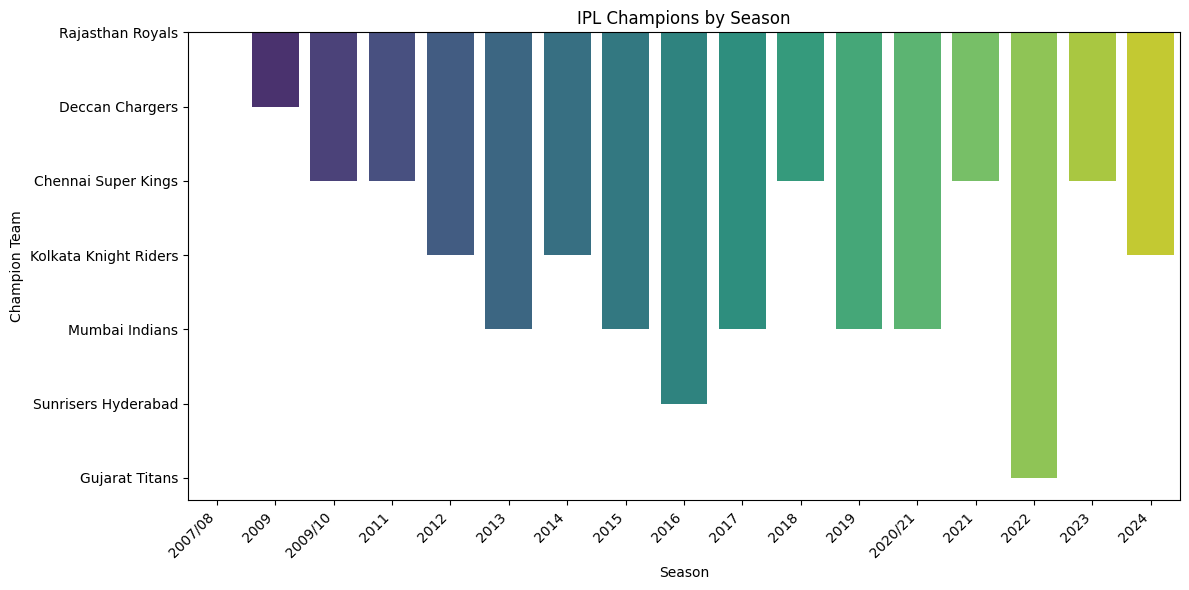

In [23]:
# Filter for final matches (assuming the last match of each season is the final)
final_matches = df.groupby('season').tail(1)

# Extract the season and winner for each final match
champions_timeline = final_matches[['season', 'winner']].reset_index(drop=True)

print("IPL Champions Timeline:")
display(champions_timeline)

# Visualize the timeline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='winner', data=champions_timeline, palette='viridis')
plt.title('IPL Champions by Season')
plt.xlabel('Season')
plt.ylabel('Champion Team')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

2. What is the average target set by teams across seasons? Is it increasing?

Average target runs by season:


,target_runs
season,
2007/08,159.775862
2009,148.807018
2009/10,165.783333
2011,154.041667
2012,158.540541
2013,156.894737
2014,162.383333
2015,164.706897
2016,160.783333


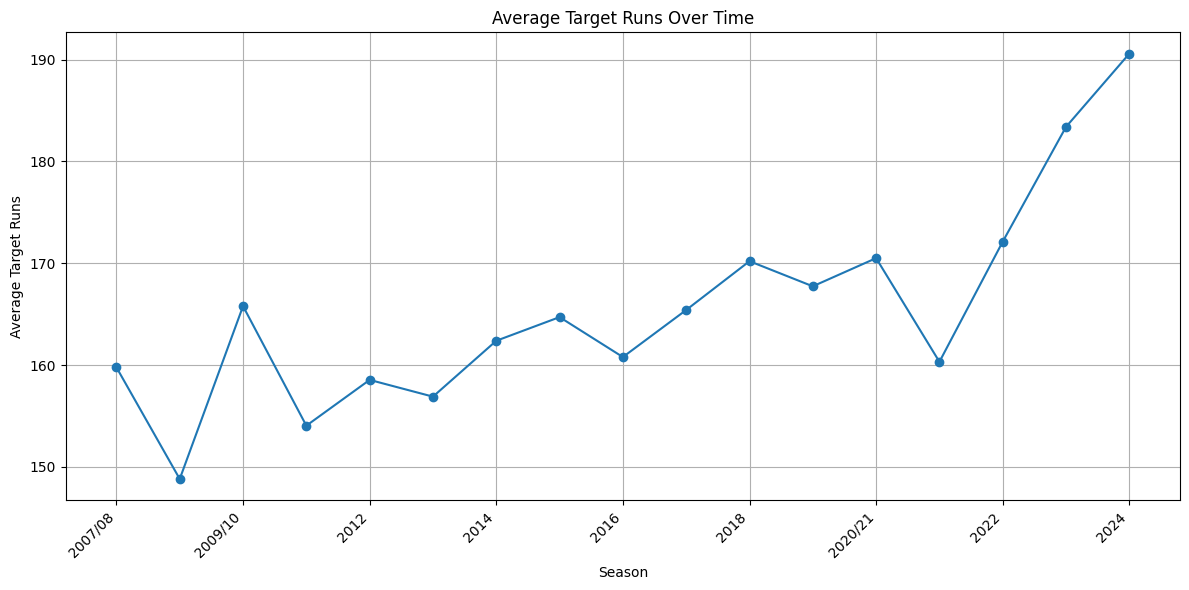

In [24]:
# Calculate the average target runs per season
average_target_by_season = df.groupby('season')['target_runs'].mean()

print("Average target runs by season:")
display(average_target_by_season)

# Optional: Visualize the trend
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
average_target_by_season.plot(kind='line', marker='o')
plt.title('Average Target Runs Over Time')
plt.xlabel('Season')
plt.ylabel('Average Target Runs')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

3. Analyze the average overs taken to chase targets. Are teams becoming more
aggressive?

Average overs taken to chase targets by season:


,target_overs
season,
2007/08,19.941176
2009,19.517241
2009/10,20.000000
2011,19.743590
2012,19.800000
2013,20.000000
2014,19.594595
2015,19.000000
2016,19.717949


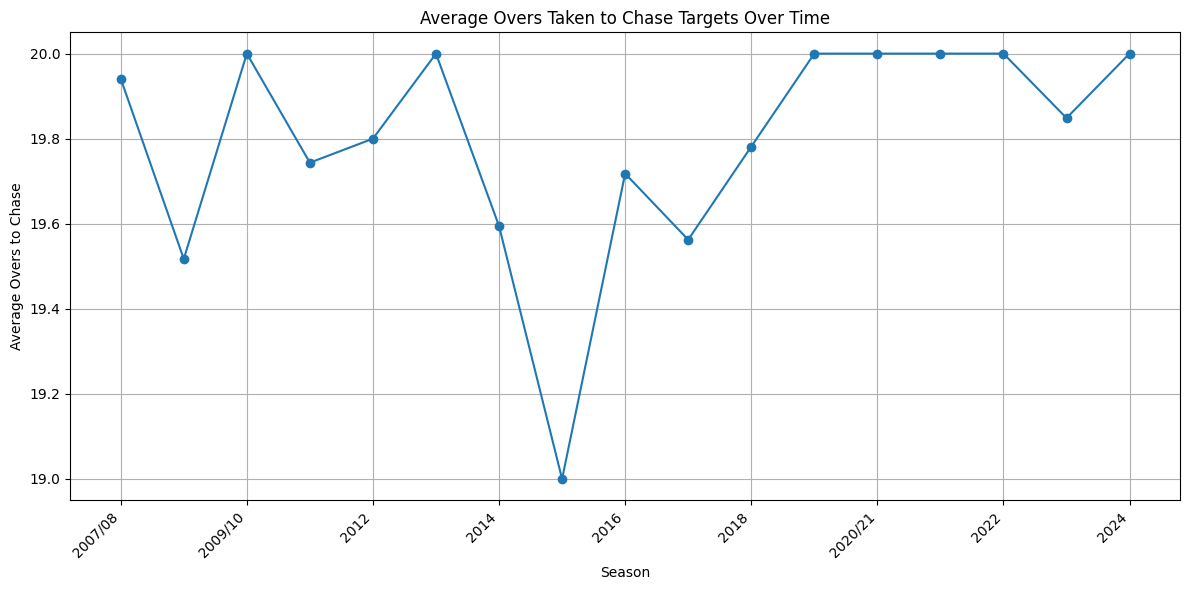

In [25]:
# Filter for matches won by chasing ('wickets')
chasing_wins_df = df[df['result'] == 'wickets'].copy()

# Calculate the average overs taken to chase per season
# We use 'target_overs' as a proxy for overs taken to chase, assuming successful chases finish within the target overs.
# Note: This might not be entirely accurate as some chases might end before the full target overs.
average_overs_to_chase_by_season = chasing_wins_df.groupby('season')['target_overs'].mean()

print("Average overs taken to chase targets by season:")
display(average_overs_to_chase_by_season)

# Optional: Visualize the trend
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
average_overs_to_chase_by_season.plot(kind='line', marker='o')
plt.title('Average Overs Taken to Chase Targets Over Time')
plt.xlabel('Season')
plt.ylabel('Average Overs to Chase')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

4. Find and rank team rivalries based on frequency and closeness (e.g., win % close to
50/50).

In [26]:
# Get a list of all unique teams
all_teams = pd.concat([df['team1'], df['team2']]).unique()

# Create a dictionary to store rivalry data
rivalries = {}

# Iterate through all unique pairs of teams
for team1 in all_teams:
    for team2 in all_teams:
        if team1 != team2:
            # Ensure we only count each rivalry once (e.g., CSK vs MI is the same as MI vs CSK)
            rivalry_key = tuple(sorted((team1, team2)))

            if rivalry_key not in rivalries:
                # Filter matches played between the two teams
                team_rivalry_df = df[
                    ((df['team1'] == team1) & (df['team2'] == team2)) |
                    ((df['team1'] == team2) & (df['team2'] == team1))
                ]

                # Get the total number of matches played between them
                total_matches = len(team_rivalry_df)

                if total_matches > 0:
                    # Count wins for each team
                    team1_wins = len(team_rivalry_df[team_rivalry_df['winner'] == team1])
                    team2_wins = len(team_rivalry_df[team_rivalry_df['winner'] == team2])

                    # Calculate win percentages (handle cases with no wins)
                    team1_win_percent = (team1_wins / total_matches) * 100 if total_matches > 0 else 0
                    team2_win_percent = (team2_wins / total_matches) * 100 if total_matches > 0 else 0

                    # Calculate closeness metric (absolute difference from 50%)
                    closeness = abs(team1_win_percent - 50)

                    # Store the rivalry data
                    rivalries[rivalry_key] = {
                        'team1': team1,
                        'team2': team2,
                        'total_matches': total_matches,
                        'team1_wins': team1_wins,
                        'team2_wins': team2_wins,
                        'team1_win_percent': team1_win_percent,
                        'team2_win_percent': team2_win_percent,
                        'closeness': closeness
                    }

# Convert the dictionary to a DataFrame
rivalries_df = pd.DataFrame.from_dict(rivalries, orient='index')

# Reset index and rename columns
rivalries_df.reset_index(inplace=True)
rivalries_df.rename(columns={'index': 'rivalry'}, inplace=True)

# Rank rivalries by frequency (total matches) and then by closeness (lower closeness is better)
ranked_rivalries = rivalries_df.sort_values(by=['total_matches', 'closeness'], ascending=[False, True])

print("Ranked Team Rivalries (by frequency and closeness):")
# Display top 20 rivalries for brevity
display(ranked_rivalries.head(20))

Ranked Team Rivalries (by frequency and closeness):


,level_0,level_1,team1,team2,total_matches,team1_wins,team2_wins,team1_win_percent,team2_win_percent,closeness
44,Chennai Super Kings,Mumbai Indians,Mumbai Indians,Chennai Super Kings,37,20,17,54.054054,45.945946,4.054054
41,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,Kolkata Knight Riders,34,23,11,67.647059,32.352941,17.647059
2,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,Mumbai Indians,32,14,18,43.750000,56.250000,6.250000
3,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,32,14,18,43.750000,56.250000,6.250000
6,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,Chennai Super Kings,30,10,20,33.333333,66.666667,16.666667
4,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,Rajasthan Royals,29,15,12,51.724138,41.379310,1.724138
42,Mumbai Indians,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,29,15,14,51.724138,48.275862,1.724138
71,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,Chennai Super Kings,29,13,16,44.827586,55.172414,5.172414
58,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,Chennai Super Kings,29,10,19,34.482759,65.517241,15.517241
56,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,28,14,14,50.000000,50.000000,0.000000


5. Are there players who perform better in certain venues? (based on PoM count)

In [27]:
# Count Player of the Match awards by player and venue
pom_by_player_venue = df.groupby(['player_of_match', 'venue']).size().reset_index(name='pom_count')

# Find the venue where each player has the most PoM awards
most_pom_venue_per_player = pom_by_player_venue.loc[pom_by_player_venue.groupby('player_of_match')['pom_count'].idxmax()]

# Filter for players with a significant number of PoM awards (e.g., at least 5 total PoM awards)
# This threshold can be adjusted based on what is considered "significant"
significant_players_pom = player_of_match_counts[player_of_match_counts >= 5].index
players_performing_better_at_venue = most_pom_venue_per_player[
    most_pom_venue_per_player['player_of_match'].isin(significant_players_pom)
].sort_values(by='pom_count', ascending=False)


print("Players who perform better in certain venues (based on PoM count and minimum 5 total PoM awards):")
display(players_performing_better_at_venue)

# Note: This analysis shows the venue where a player has won the *most* PoM awards.
# It doesn't definitively prove they *perform better* there compared to other venues
# without normalizing by the number of matches played at each venue, which is not
# directly available in this dataset at a player-venue level.

Players who perform better in certain venues (based on PoM count and minimum 5 total PoM awards):


,player_of_match,venue,pom_count
141,CH Gayle,M Chinnaswamy Stadium,9
53,AD Russell,Eden Gardens,8
621,RG Sharma,Wankhede Stadium,7
176,DA Warner,"Rajiv Gandhi International Stadium, Uppal",7
32,AB de Villiers,M Chinnaswamy Stadium,6
...,...,...,...
540,PA Patel,Dubai International Cricket Stadium,1
735,SR Tendulkar,Brabourne Stadium,1
730,SPD Smith,"MA Chidambaram Stadium, Chepauk",1
841,WP Saha,Dubai International Cricket Stadium,1


6. Is there a bias in Player of the Match selection? (e.g., more awards to batsmen vs
bowlers)

**Answer to Question 6: Is there a bias in Player of the Match selection?**

Based on the available data, it is not possible to definitively determine if there is a bias in Player of the Match selection towards batsmen or bowlers. The dataset does not include information about the playing role (batsman, bowler, all-rounder) of each player. To analyze this type of bias, we would need a dataset with player role information to compare the number of Player of the Match awards given to players in different roles.

7. Cluster cities or venues based on average run margins and wicket margins.

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average run margin for wins by runs at each venue
avg_run_margin_by_venue = df[df['result'] == 'runs'].groupby('venue')['result_margin'].mean().reset_index()
avg_run_margin_by_venue.rename(columns={'result_margin': 'avg_run_margin'}, inplace=True)

# Calculate average wicket margin for wins by wickets at each venue
avg_wicket_margin_by_venue = df[df['result'] == 'wickets'].groupby('venue')['result_margin'].mean().reset_index()
avg_wicket_margin_by_venue.rename(columns={'result_margin': 'avg_wicket_margin'}, inplace=True)

# Merge the two dataframes
venue_margins = pd.merge(avg_run_margin_by_venue, avg_wicket_margin_by_venue, on='venue', how='outer').fillna(0)

# Prepare data for clustering (using only margin data)
X_venue = venue_margins[['avg_run_margin', 'avg_wicket_margin']]

# Scale the data
scaler = StandardScaler()
X_scaled_venue = scaler.fit_transform(X_venue)

# Determine optimal number of clusters using the elbow method (optional but recommended)
# inertia = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
#     kmeans.fit(X_scaled_venue)
#     inertia.append(kmeans.inertia_)

# Plot the elbow method graph to choose the number of clusters
# plt.figure(figsize=(8, 4))
# plt.plot(range(1, 11), inertia, marker='o')
# plt.title('Elbow Method for Venue Clustering')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Inertia')
# plt.xticks(range(1, 11))
# plt.grid(True)
# plt.show()

# Based on the elbow method (or a reasonable assumption), let's choose a number of clusters (e.g., 3)
n_clusters = 3
kmeans_venue = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
venue_margins['cluster'] = kmeans_venue.fit_predict(X_scaled_venue)

print(f"Venues clustered into {n_clusters} groups based on average winning margins:")
display(venue_margins[['venue', 'cluster', 'avg_run_margin', 'avg_wicket_margin']].sort_values(by='cluster'))

# Visualize the clusters (optional)
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='avg_run_margin', y='avg_wicket_margin', hue='cluster', data=venue_margins, palette='viridis', s=100)
# plt.title('Venue Clustering based on Average Winning Margins')
# plt.xlabel('Average Run Margin (Wins by Runs)')
# plt.ylabel('Average Wicket Margin (Wins by Wickets)')
# plt.grid(True)
# plt.show()

# Repeat the process for cities
# Calculate average run margin for wins by runs at each city
avg_run_margin_by_city = df[df['result'] == 'runs'].groupby('city')['result_margin'].mean().reset_index()
avg_run_margin_by_city.rename(columns={'result_margin': 'avg_run_margin'}, inplace=True)

# Calculate average wicket margin for wins by wickets at each city
avg_wicket_margin_by_city = df[df['result'] == 'wickets'].groupby('city')['result_margin'].mean().reset_index()
avg_wicket_margin_by_city.rename(columns={'result_margin': 'avg_wicket_margin'}, inplace=True)

# Merge the two dataframes
city_margins = pd.merge(avg_run_margin_by_city, avg_wicket_margin_by_city, on='city', how='outer').fillna(0)

# Prepare data for clustering (using only margin data)
X_city = city_margins[['avg_run_margin', 'avg_wicket_margin']]

# Scale the data
X_scaled_city = scaler.fit_transform(X_city)

# Determine optimal number of clusters using the elbow method (optional but recommended)
# inertia_city = []
# for i in range(1, 11):
#     kmeans_city = KMeans(n_clusters=i, random_state=42, n_init=10)
#     kmeans_city.fit(X_scaled_city)
#     inertia_city.append(kmeans_city.inertia_)

# Plot the elbow method graph for cities
# plt.figure(figsize=(8, 4))
# plt.plot(range(1, 11), inertia_city, marker='o')
# plt.title('Elbow Method for City Clustering')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Inertia')
# plt.xticks(range(1, 11))
# plt.grid(True)
# plt.show()

# Based on the elbow method (or a reasonable assumption), let's choose a number of clusters (e.g., 3)
n_clusters_city = 3
kmeans_city = KMeans(n_clusters=n_clusters_city, random_state=42, n_init=10)
city_margins['cluster'] = kmeans_city.fit_predict(X_scaled_city)

print(f"\nCities clustered into {n_clusters_city} groups based on average winning margins:")
display(city_margins[['city', 'cluster', 'avg_run_margin', 'avg_wicket_margin']].sort_values(by='cluster'))

# Visualize the clusters (optional)
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='avg_run_margin', y='avg_wicket_margin', hue='cluster', data=city_margins, palette='viridis', s=100)
# plt.title('City Clustering based on Average Winning Margins')
# plt.xlabel('Average Run Margin (Wins by Runs)')
# plt.ylabel('Average Wicket Margin (Wins by Wickets)')
# plt.grid(True)
# plt.show()

Venues clustered into 3 groups based on average winning margins:


,venue,cluster,avg_run_margin,avg_wicket_margin
1,"Arun Jaitley Stadium, Delhi",0,32.444444,5.857143
3,"Barsapara Cricket Stadium, Guwahati",0,31.000000,5.000000
6,"Brabourne Stadium, Mumbai",0,28.375000,6.333333
4,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,0,33.142857,5.333333
7,Buffalo Park,0,43.500000,7.000000
10,"Dr DY Patil Sports Academy, Mumbai",0,28.300000,6.100000
9,Dr DY Patil Sports Academy,0,28.142857,6.400000
8,De Beers Diamond Oval,0,53.000000,5.000000
13,Dubai International Cricket Stadium,0,35.190476,6.318182
11,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,0,40.285714,5.000000



Cities clustered into 3 groups based on average winning margins:


,city,cluster,avg_run_margin,avg_wicket_margin
3,Bengaluru,0,18.133333,4.923077
4,Bloemfontein,0,14.000000,6.000000
6,Centurion,0,20.250000,6.125000
13,Durban,0,17.666667,5.500000
25,Mohali,0,5.500000,3.333333
27,Nagpur,0,7.500000,6.000000
20,Kanpur,0,0.000000,5.500000
19,Johannesburg,0,8.333333,7.000000
31,Raipur,0,10.500000,6.250000
33,Ranchi,0,20.500000,4.800000


8. Are there any seasons where the toss winner had abnormally high match win %?

In [29]:
# Calculate the number of matches where the toss winner was also the match winner for each season
toss_winner_match_winner_by_season = df[df['toss_winner'] == df['winner']].groupby('season').size()

# Calculate the total number of matches played in each season
total_matches_by_season = df.groupby('season').size()

# Calculate the win percentage for toss winners in each season
toss_winner_win_percentage_by_season = (toss_winner_match_winner_by_season / total_matches_by_season) * 100

print("Toss winner match win percentage by season:")
display(toss_winner_win_percentage_by_season)

# You can analyze this output to see if any season has a significantly higher percentage
# compared to others or the overall average (which we calculated in a previous cell).
# For example, you could calculate the mean and standard deviation of these percentages
# and identify seasons that are more than a certain number of standard deviations above the mean.

Toss winner match win percentage by season:


,0
season,
2007/08,48.275862
2009,57.894737
2009/10,51.666667
2011,52.054795
2012,44.594595
2013,47.368421
2014,50.000000
2015,47.457627
2016,56.666667


9. Perform year-wise analysis of average result margin and see if the matches are
becoming tighter.

Average result margin by season:


,result_margin
season,
2007/08,15.965517
2009,16.857143
2009/10,19.762712
2011,18.930556
2012,16.229730
2013,19.837838
2014,14.728814
2015,17.821429
2016,15.333333


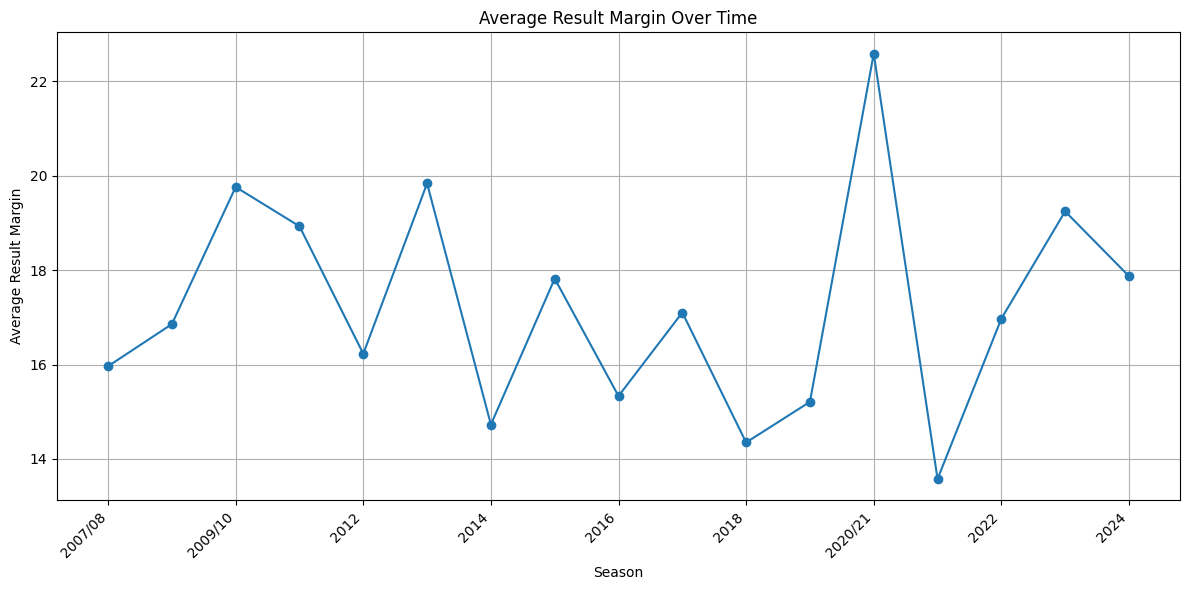

In [30]:
# Calculate the average result margin per season
average_result_margin_by_season = df.groupby('season')['result_margin'].mean()

print("Average result margin by season:")
display(average_result_margin_by_season)

# Optional: Visualize the trend
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
average_result_margin_by_season.plot(kind='line', marker='o')
plt.title('Average Result Margin Over Time')
plt.xlabel('Season')
plt.ylabel('Average Result Margin')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

10. Identify the most unpredictable season using number of super overs, narrow wins,
upsets (team1 < team2 win ratio historically but lost).

In [31]:
# Metric 1: Number of Super Overs (already calculated in previous cell)
# super_over_counts_by_season

# Metric 2: Number of Narrow Wins (Close Matches) (already calculated in previous cell)
# close_match_counts_by_season

# Metric 3: Upsets
# Calculate historical win ratio for each team pair
team_match_counts = df['team1'].value_counts().add(df['team2'].value_counts(), fill_value=0)
team_win_counts = df['winner'].value_counts()
team_win_ratio = (team_win_counts / team_match_counts).fillna(0)

# Identify upsets: matches where the team with a lower historical win ratio won
upsets_by_season = {}
for season in df['season'].unique():
    season_df = df[df['season'] == season]
    upset_count = 0
    for index, row in season_df.iterrows():
        team1 = row['team1']
        team2 = row['team2']
        winner = row['winner']

        if team1 in team_win_ratio.index and team2 in team_win_ratio.index:
            team1_ratio = team_win_ratio[team1]
            team2_ratio = team_win_ratio[team2]

            # Define an upset as the team with the lower historical win ratio winning
            # Consider ties or no results as not upsets in this context
            if row['result'] != 'tie' and row['result'] != 'no result':
                 if team1_ratio < team2_ratio and winner == team1:
                    upset_count += 1
                 elif team2_ratio < team1_ratio and winner == team2:
                     upset_count +=1 # Count upsets regardless of whether team1 or team2 is the historical underdog


    upsets_by_season[season] = upset_count

upsets_by_season_series = pd.Series(upsets_by_season)


# Combine the metrics and normalize them for comparison
# Align indices of all series
all_seasons = df['season'].unique()
super_over_counts_aligned = super_over_counts_by_season.reindex(all_seasons, fill_value=0)
close_match_counts_aligned = close_match_counts_by_season.reindex(all_seasons, fill_value=0)
upsets_by_season_aligned = upsets_by_season_series.reindex(all_seasons, fill_value=0)


# Normalize metrics (Min-Max scaling)
def min_max_scale(series):
    return (series - series.min()) / (series.max() - series.min())

super_over_scaled = min_max_scale(super_over_counts_aligned)
close_matches_scaled = min_max_scale(close_match_counts_aligned)
upsets_scaled = min_max_scale(upsets_by_season_aligned)

# Combine normalized metrics (you can adjust weights if needed)
unpredictability_score = super_over_scaled + close_matches_scaled + upsets_scaled

# Rank seasons by unpredictability score
most_unpredictable_season = unpredictability_score.sort_values(ascending=False)

print("Unpredictability score by season (higher score = more unpredictable):")
display(most_unpredictable_season)

# Identify the season with the highest unpredictability score
most_unpredictable_season_name = most_unpredictable_season.index[0]
print(f"\nThe most unpredictable season based on the combined metrics is: {most_unpredictable_season_name}")

Unpredictability score by season (higher score = more unpredictable):


,0
season,
2024,1.454545
2023,1.380952
2013,1.283550
2020/21,1.238095
2009,1.228355
2022,1.216450
2015,1.215368
2021,1.037879
2019,0.824675



The most unpredictable season based on the combined metrics is: 2024


EXPERT

Objective: End-to-end synthesis, hypothesis testing, pattern recognition, and storytelling.

1. Do teams win more in their home city? Create a city-to-team mapping and analyze.

In [32]:
# Create a mapping of teams to their primary home cities
# This mapping is based on common knowledge and might not cover all historical variations
home_city_mapping = {
    'Mumbai Indians': 'Mumbai',
    'Kolkata Knight Riders': 'Kolkata',
    'Royal Challengers Bangalore': 'Bangalore',
    'Chennai Super Kings': 'Chennai',
    'Rajasthan Royals': 'Jaipur',
    'Delhi Daredevils': 'Delhi',
    'Deccan Chargers': 'Hyderabad', # Moved to Visakhapatnam later, but Hyderabad was primary
    'Kings XI Punjab': 'Chandigarh', # Played in multiple venues, Chandigarh is a primary one
    'Pune Warriors': 'Pune',
    'Sunrisers Hyderabad': 'Hyderabad',
    'Gujarat Lions': 'Rajkot', # Also played in Kanpur
    'Rising Pune Supergiants': 'Pune',
    'Rising Pune Supergiant': 'Pune',
    'Delhi Capitals': 'Delhi',
    'Punjab Kings': 'Chandigarh', # Successor to Kings XI Punjab
    'Gujarat Titans': 'Ahmedabad',
    'Lucknow Super Giants': 'Lucknow',
    'Kochi Tuskers Kerala': 'Kochi',

    # Add any other teams and their home cities if necessary
}

# Filter matches to include only those played in a team's home city
home_matches = df[df.apply(lambda row: row['city'] in [home_city_mapping.get(row['team1']), home_city_mapping.get(row['team2'])], axis=1)].copy()

# Calculate total matches played by each team (overall and at home)
total_matches_overall = df['team1'].value_counts().add(df['team2'].value_counts(), fill_value=0)
home_matches_played = home_matches['team1'].value_counts().add(home_matches['team2'].value_counts(), fill_value=0)

# Calculate total matches won by each team (overall and at home)
total_wins_overall = df['winner'].value_counts()
home_wins = home_matches['winner'].value_counts()

# Calculate win percentages
overall_win_percentage = (total_wins_overall / total_matches_overall).fillna(0) * 100
home_win_percentage = (home_wins / home_matches_played).fillna(0) * 100

# Combine the data for comparison
home_advantage_analysis = pd.DataFrame({
    'Overall Matches Played': total_matches_overall,
    'Overall Wins': total_wins_overall,
    'Overall Win %': overall_win_percentage,
    'Home Matches Played': home_matches_played,
    'Home Wins': home_wins,
    'Home Win %': home_win_percentage
}).fillna(0)

# Display the analysis
print("Home Advantage Analysis:")
display(home_advantage_analysis.sort_values(by='Home Win %', ascending=False))

# You can further analyze this data, e.g., compare 'Overall Win %' and 'Home Win %'
home_advantage_analysis['Home Win % Difference'] = home_advantage_analysis['Home Win %'] - home_advantage_analysis['Overall Win %']

print("\nHome Win % Difference (Home Win % - Overall Win %):")
display(home_advantage_analysis.sort_values(by='Home Win % Difference', ascending=False)[['Home Win % Difference']])

Home Advantage Analysis:


,Overall Matches Played,Overall Wins,Overall Win %,Home Matches Played,Home Wins,Home Win %
Rising Pune Supergiant,16,10,62.500000,14,10,71.428571
Chennai Super Kings,238,138,57.983193,137,83,60.583942
Mumbai Indians,261,144,55.172414,181,105,58.011050
Kolkata Knight Riders,251,131,52.191235,160,86,53.750000
Gujarat Titans,45,28,62.222222,28,15,53.571429
Lucknow Super Giants,44,24,54.545455,28,15,53.571429
Delhi Capitals,91,48,52.747253,36,19,52.777778
Sunrisers Hyderabad,182,88,48.351648,108,57,52.777778
Rajasthan Royals,221,112,50.678733,123,63,51.219512
Punjab Kings,56,24,42.857143,16,8,50.000000



Home Win % Difference (Home Win % - Overall Win %):


,Home Win % Difference
Rising Pune Supergiant,8.928571
Punjab Kings,7.142857
Sunrisers Hyderabad,4.426129
Mumbai Indians,2.838636
Chennai Super Kings,2.600748
Kochi Tuskers Kerala,2.597403
Kolkata Knight Riders,1.558765
Gujarat Lions,0.666667
Rajasthan Royals,0.540779
Delhi Capitals,0.030525


2. Explore anomalies: Identify matches where a team lost despite setting a high target
(>190) or chasing a low score (<120).

In [33]:
# Anomaly 1: Team lost despite setting a high target (>190)
high_target_losses = df[
    (df['target_runs'] > 190) &
    (df['result'] == 'wickets') # Team batting second won (chasing)
]

print("Matches where a team lost despite setting a high target (>190):")
display(high_target_losses[['season', 'city', 'team1', 'team2', 'winner', 'target_runs', 'result', 'result_margin']])

# Anomaly 2: Team lost despite chasing a low score (<120)
low_score_chasing_losses = df[
    (df['target_runs'] < 120) &
    (df['result'] == 'runs') # Team batting first won (defending)
]

print("\nMatches where a team lost despite chasing a low score (<120):")
display(low_score_chasing_losses[['season', 'city', 'team1', 'team2', 'winner', 'target_runs', 'result', 'result_margin']])

Matches where a team lost despite setting a high target (>190):


,season,city,team1,team2,winner,target_runs,result,result_margin
8,2007/08,Hyderabad,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,215.0,wickets,3.0
121,2009/10,Bangalore,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,204.0,wickets,8.0
148,2009/10,Kolkata,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,201.0,wickets,8.0
168,2009/10,Dharamsala,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,193.0,wickets,6.0
260,2012,Chennai,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,206.0,wickets,5.0
267,2012,Jaipur,Rajasthan Royals,Deccan Chargers,Rajasthan Royals,197.0,wickets,5.0
306,2012,Chandigarh,Kings XI Punjab,Deccan Chargers,Kings XI Punjab,191.0,wickets,4.0
321,2012,Chennai,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,191.0,wickets,5.0
372,2013,Chandigarh,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,191.0,wickets,6.0
400,2014,Abu Dhabi,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,206.0,wickets,6.0



Matches where a team lost despite chasing a low score (<120):


,season,city,team1,team2,winner,target_runs,result,result_margin
38,2007/08,Delhi,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,89.0,runs,6.0
41,2007/08,Kolkata,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,53.0,runs,3.0
63,2009,Durban,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,69.0,runs,11.0
109,2009,Durban,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,117.0,runs,24.0
221,2011,Kolkata,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,52.0,runs,10.0
391,2013,Bangalore,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,107.0,runs,24.0
476,2015,Visakhapatnam,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,118.0,runs,16.0
506,2015,Chandigarh,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,107.0,runs,22.0
538,2016,Hyderabad,Sunrisers Hyderabad,Rising Pune Supergiants,Rising Pune Supergiants,61.0,runs,34.0
565,2016,Visakhapatnam,Rising Pune Supergiants,Delhi Daredevils,Rising Pune Supergiants,58.0,runs,19.0


3. Create a dashboard or summary report of team-wise performance trends over the years.

Detected winner-like columns: ['toss_winner', 'winner']


/tmp/ipython-input-1398044830.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_wins.values, y=overall_wins.index, palette="viridis")


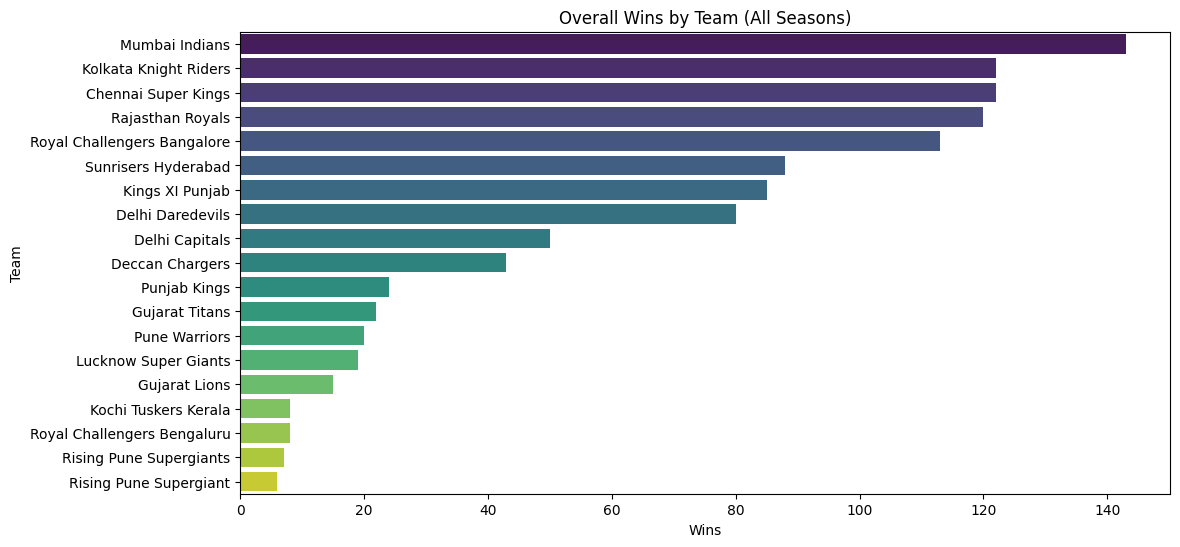

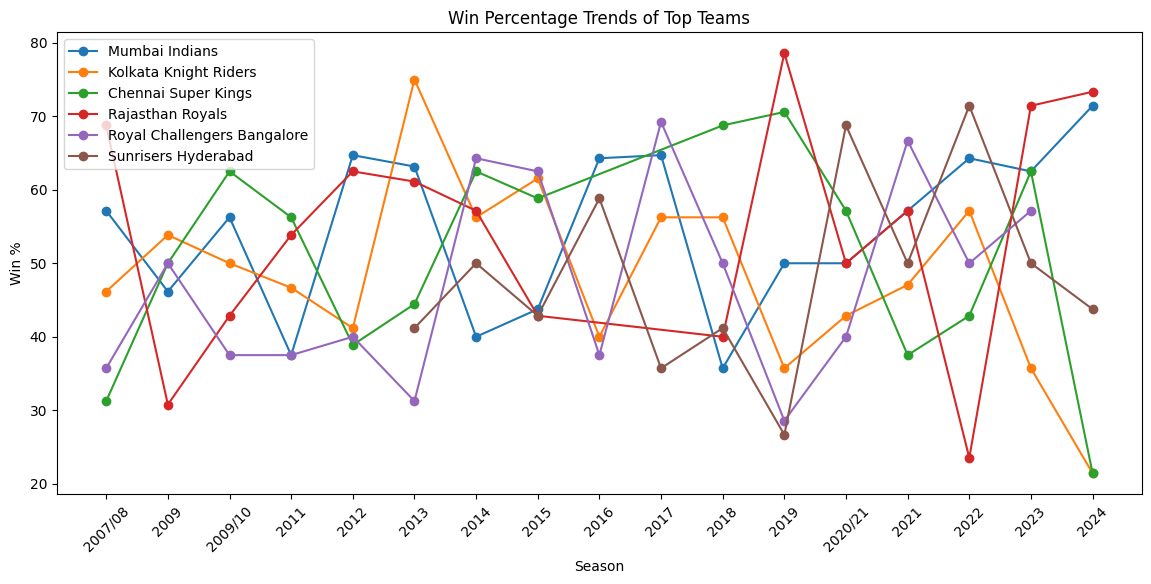

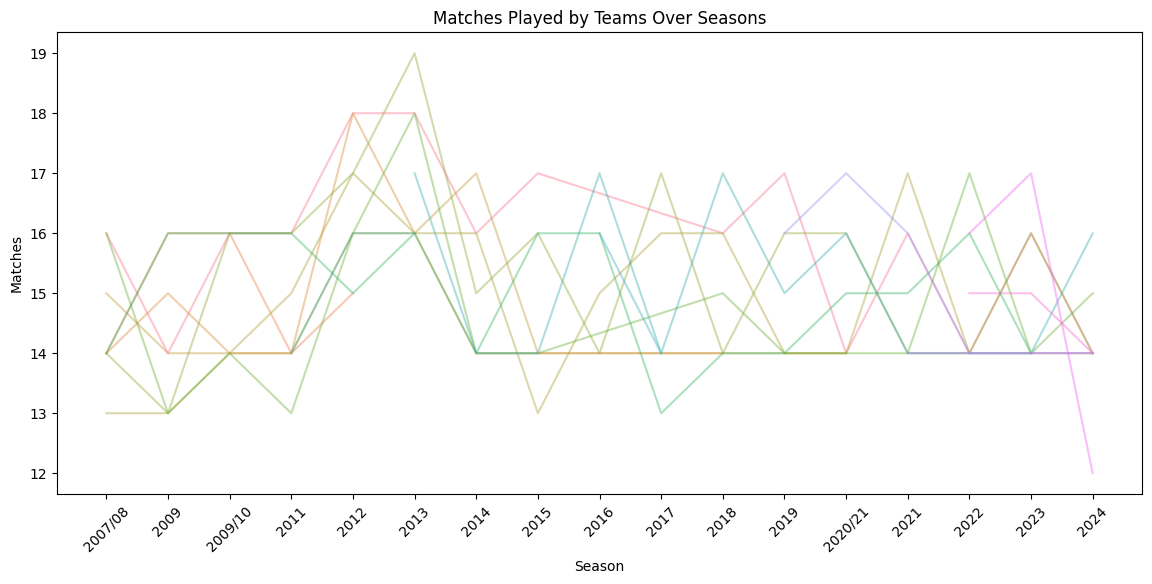

 Team-wise performance summary saved as team_wise_performance_trends.csv


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/matches (1).csv"
matches = pd.read_csv(file_path)

# --- Step 1: Detect winner column ---
possible_winner_cols = [c for c in matches.columns if "win" in c.lower()]
print("Detected winner-like columns:", possible_winner_cols)

# Assume first matching column is the winner column
winner_col = possible_winner_cols[0] if possible_winner_cols else None
if not winner_col:
    raise ValueError("No winner column found in dataset!")

# --- Step 2: Clean dataset ---
valid_matches = matches.dropna(subset=[winner_col])
valid_matches = valid_matches[valid_matches[winner_col] != 'No Result']

# --- Step 3: Build long-format match results ---
records = []
for _, row in valid_matches.iterrows():
    for team in [row['team1'], row['team2']]:
        season = row['season']
        winner = row[winner_col]
        result = "win" if team == winner else "loss"
        records.append([season, team, result])

long_df = pd.DataFrame(records, columns=['season','team','result'])

# --- Step 4: Summarize team performance per season ---
summary = (
    long_df.groupby(['season','team','result'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

summary['matches'] = summary['win'] + summary['loss']
summary['win_pct'] = (summary['win'] / summary['matches']) * 100

# --- Step 5: Dashboard Plots ---

# 1. Overall Wins by Team
plt.figure(figsize=(12,6))
overall_wins = summary.groupby('team')['win'].sum().sort_values(ascending=False)
sns.barplot(x=overall_wins.values, y=overall_wins.index, palette="viridis")
plt.title("Overall Wins by Team (All Seasons)")
plt.xlabel("Wins")
plt.ylabel("Team")
plt.show()

# 2. Win % Trends for Top Teams
top_teams = overall_wins.head(6).index
plt.figure(figsize=(14,6))
for team in top_teams:
    trend = summary[summary['team'] == team]
    plt.plot(trend['season'], trend['win_pct'], marker='o', label=team)
plt.title("Win Percentage Trends of Top Teams")
plt.xlabel("Season")
plt.ylabel("Win %")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# 3. Matches Played Each Season
plt.figure(figsize=(14,6))
sns.lineplot(data=summary, x='season', y='matches', hue='team', legend=False, alpha=0.4)
plt.title("Matches Played by Teams Over Seasons")
plt.xlabel("Season")
plt.ylabel("Matches")
plt.xticks(rotation=45)
plt.show()

# --- Step 6: Save Report ---
summary.to_csv("team_wise_performance_trends.csv", index=False)
print(" Team-wise performance summary saved as team_wise_performance_trends.csv")


4. Analyze performance of teams in playoffs vs league matches.

In [38]:
# Separate playoff and league matches
playoff_matches = df[df['match_type'] != 'League'].copy()
league_matches = df[df['match_type'] == 'League'].copy()

# Calculate total matches played and won by each team in league matches
league_matches_played = league_matches['team1'].value_counts().add(league_matches['team2'].value_counts(), fill_value=0)
league_wins = league_matches['winner'].value_counts()
league_win_percentage = (league_wins / league_matches_played).fillna(0) * 100

# Calculate total matches played and won by each team in playoff matches
# Need to handle teams that might not have played in playoffs
playoff_matches_played = playoff_matches['team1'].value_counts().add(playoff_matches['team2'].value_counts(), fill_value=0).reindex(league_matches_played.index, fill_value=0)
playoff_wins = playoff_matches['winner'].value_counts().reindex(league_matches_played.index, fill_value=0)
playoff_win_percentage = (playoff_wins / playoff_matches_played).replace([float('inf'), -float('inf')], float('nan')).fillna(0) * 100 # Handle division by zero if a team didn't play playoffs

# Combine the data for comparison
performance_by_match_type = pd.DataFrame({
    'League Matches Played': league_matches_played,
    'League Wins': league_wins,
    'League Win %': league_win_percentage,
    'Playoff Matches Played': playoff_matches_played,
    'Playoff Wins': playoff_wins,
    'Playoff Win %': playoff_win_percentage
}).fillna(0)

print("Team Performance in Playoff vs League Matches:")
display(performance_by_match_type.sort_values(by='Playoff Win %', ascending=False))

# You can further analyze this data, e.g., compare 'League Win %' and 'Playoff Win %'
performance_by_match_type['Playoff Win % Difference'] = performance_by_match_type['Playoff Win %'] - performance_by_match_type['League Win %']

print("\nPlayoff Win % Difference (Playoff Win % - League Win %):")
display(performance_by_match_type.sort_values(by='Playoff Win % Difference', ascending=False)[['Playoff Win % Difference']])

Team Performance in Playoff vs League Matches:


,League Matches Played,League Wins,League Win %,Playoff Matches Played,Playoff Wins,Playoff Win %
Kolkata Knight Riders,236,121,51.271186,15.0,10,66.666667
Chennai Super Kings,212,121,57.075472,26.0,17,65.384615
Mumbai Indians,241,131,54.356846,20.0,13,65.000000
Gujarat Titans,40,25,62.500000,5.0,3,60.000000
Deccan Chargers,71,27,38.028169,4.0,2,50.000000
Rising Pune Supergiant,14,9,64.285714,2.0,1,50.000000
Rajasthan Royals,210,107,50.952381,11.0,5,45.454545
Sunrisers Hyderabad,168,82,48.809524,14.0,6,42.857143
Royal Challengers Bangalore,225,110,48.888889,15.0,6,40.000000
Delhi Capitals,84,46,54.761905,7.0,2,28.571429



Playoff Win % Difference (Playoff Win % - League Win %):


,Playoff Win % Difference
Kolkata Knight Riders,15.395480
Deccan Chargers,11.971831
Mumbai Indians,10.643154
Chennai Super Kings,8.309144
Gujarat Titans,-2.500000
Rajasthan Royals,-5.497835
Sunrisers Hyderabad,-5.952381
Royal Challengers Bangalore,-8.888889
Rising Pune Supergiant,-14.285714
Kings XI Punjab,-21.774194


5. Find “choke matches” where the toss winner lost despite choosing their stronger
decision (bat/field).

In [39]:
# Calculate win percentage for each team when batting first and fielding first
bat_first_wins = df[df['toss_decision'] == 'bat'].groupby('toss_winner')['winner'].apply(lambda x: (x == x.name).sum())
field_first_wins = df[df['toss_decision'] == 'field'].groupby('toss_winner')['winner'].apply(lambda x: (x == x.name).sum())

bat_first_matches = df[df['toss_decision'] == 'bat']['toss_winner'].value_counts()
field_first_matches = df[df['toss_decision'] == 'field']['toss_winner'].value_counts()

bat_first_win_percent = (bat_first_wins / bat_first_matches).fillna(0) * 100
field_first_win_percent = (field_first_wins / field_first_matches).fillna(0) * 100

# Determine the historically stronger toss decision for each team
stronger_decision = {}
for team in bat_first_win_percent.index.union(field_first_win_percent.index):
    bat_percent = bat_first_win_percent.get(team, 0)
    field_percent = field_first_win_percent.get(team, 0)

    if bat_percent > field_percent:
        stronger_decision[team] = 'bat'
    elif field_percent > bat_percent:
        stronger_decision[team] = 'field'
    else:
        stronger_decision[team] = 'either' # Or handle as needed for ties


# Identify "choke matches"
choke_matches = []
for index, row in df.iterrows():
    toss_winner = row['toss_winner']
    toss_decision = row['toss_decision']
    winner = row['winner']

    if toss_winner in stronger_decision:
        team_stronger_decision = stronger_decision[toss_winner]

        # Check if toss winner made their stronger decision and lost
        if toss_decision == team_stronger_decision and toss_winner != winner:
            choke_matches.append(row)

choke_matches_df = pd.DataFrame(choke_matches)

print("Matches where the toss winner lost despite choosing their historically stronger decision:")
display(choke_matches_df[['season', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result']])

Matches where the toss winner lost despite choosing their historically stronger decision:


,season,city,team1,team2,toss_winner,toss_decision,winner,result
0,2007/08,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs
3,2007/08,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets
4,2007/08,Kolkata,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets
6,2007/08,Hyderabad,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets
16,2007/08,Delhi,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Delhi Daredevils,runs
...,...,...,...,...,...,...,...,...
1080,2024,Hyderabad,Lucknow Super Giants,Sunrisers Hyderabad,Lucknow Super Giants,bat,Sunrisers Hyderabad,wickets
1081,2024,Dharamsala,Royal Challengers Bengaluru,Punjab Kings,Punjab Kings,field,Royal Challengers Bengaluru,runs
1082,2024,Ahmedabad,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,Gujarat Titans,runs
1089,2024,Bengaluru,Royal Challengers Bengaluru,Chennai Super Kings,Chennai Super Kings,field,Royal Challengers Bengaluru,runs


6. Create a PoM impact score for each player and visualize top 10 over all seasons.

Top 10 Players by PoM Impact Score (Total PoM Awards):


,count
player_of_match,
AB de Villiers,25
CH Gayle,22
RG Sharma,19
DA Warner,18
V Kohli,18
MS Dhoni,17
RA Jadeja,16
SR Watson,16
YK Pathan,16


/tmp/ipython-input-87204074.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_players_impact.index, y=top_10_players_impact.values, palette='viridis')


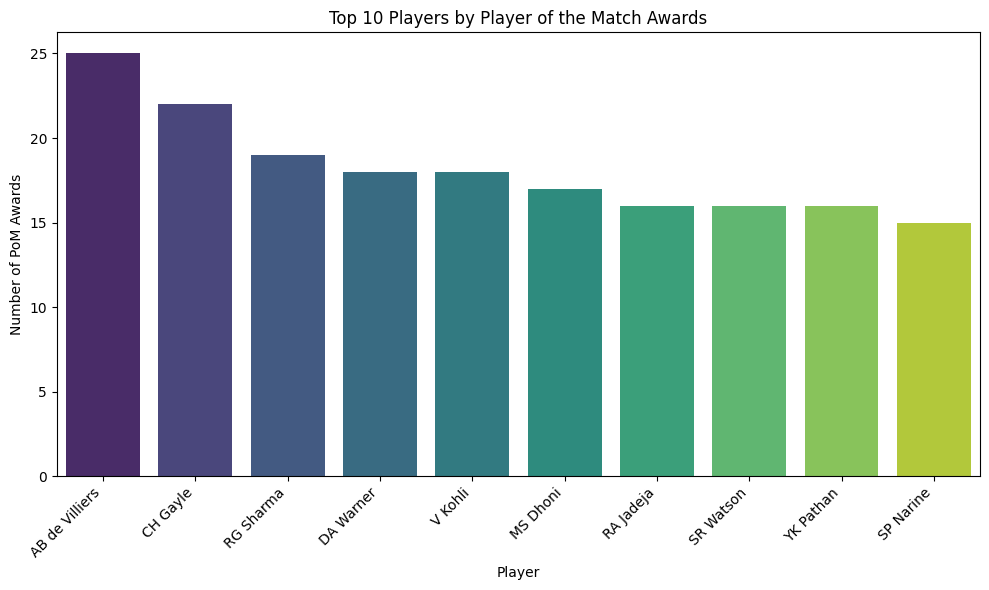

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate PoM impact score (using total PoM awards as the score)
# player_of_match_counts was already calculated in a previous cell (YzKv8kXyBA03)
pom_impact_score = player_of_match_counts.sort_values(ascending=False)

# Select the top 10 players based on the impact score
top_10_players_impact = pom_impact_score.head(10)

print("Top 10 Players by PoM Impact Score (Total PoM Awards):")
display(top_10_players_impact)

# Visualize the top 10 players' PoM impact score
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_players_impact.index, y=top_10_players_impact.values, palette='viridis')
plt.title('Top 10 Players by Player of the Match Awards')
plt.xlabel('Player')
plt.ylabel('Number of PoM Awards')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

7. Build a venue impact model: What venues give stronger home advantage (based on
winning ratio of home team)?

In [41]:
# Use the previously created home_city_mapping
# home_city_mapping = { ... }

# Create a mapping from venue to likely home team
# This assumes that the primary home team for a city plays most of their matches at the primary venue in that city
venue_to_home_team = {}
for venue in df['venue'].unique():
    city = df[df['venue'] == venue]['city'].mode().iloc[0] # Get the most common city for the venue
    for team, home_city in home_city_mapping.items():
        if home_city == city:
            # Simple approach: assign the first team found for that city as the home team for the venue
            # A more sophisticated approach would involve analyzing which team plays most matches at the venue
            venue_to_home_team[venue] = team
            break # Assume one primary home team per venue for simplicity


# Calculate the home team's win percentage at each venue
venue_home_win_percentage = {}

for venue in df['venue'].unique():
    if venue in venue_to_home_team:
        home_team = venue_to_home_team[venue]

        # Filter matches played at the current venue
        venue_matches = df[df['venue'] == venue]

        # Filter matches where the home team was team1 or team2 at this venue
        home_team_matches_at_venue = venue_matches[(venue_matches['team1'] == home_team) | (venue_matches['team2'] == home_team)]

        # Count matches played by the home team at this venue
        total_home_matches_at_venue = len(home_team_matches_at_venue)

        if total_home_matches_at_venue > 0:
            # Count matches won by the home team at this venue
            home_wins_at_venue = len(home_team_matches_at_venue[home_team_matches_at_venue['winner'] == home_team])

            # Calculate home win percentage at the venue
            win_percent = (home_wins_at_venue / total_home_matches_at_venue) * 100
            venue_home_win_percentage[venue] = win_percent
        else:
            venue_home_win_percentage[venue] = 0 # No home matches played at this venue


# Convert to a DataFrame for easier display and analysis
venue_home_win_df = pd.DataFrame.from_dict(venue_home_win_percentage, orient='index', columns=['Home Win % at Venue'])
venue_home_win_df.index.name = 'Venue'

print("Venue Home Advantage Analysis (based on Home Team Winning Ratio):")
display(venue_home_win_df.sort_values(by='Home Win % at Venue', ascending=False))

# Note: This is a simplified model of venue impact based solely on home team winning percentage.
# A more comprehensive model would consider other factors like average scores, toss decisions impact, etc.

Venue Home Advantage Analysis (based on Home Team Winning Ratio):


,Home Win % at Venue
Venue,
Punjab Cricket Association IS Bindra Stadium,80.000000
MA Chidambaram Stadium,77.777778
Brabourne Stadium,71.428571
Dr DY Patil Sports Academy,71.428571
"MA Chidambaram Stadium, Chepauk",70.212766
Sawai Mansingh Stadium,68.085106
"MA Chidambaram Stadium, Chepauk, Chennai",66.666667
Wankhede Stadium,62.686567
Eden Gardens,60.810811


8. Create a matchup matrix between all teams — win/loss % of one over the other.

In [46]:
import pandas as pd
import numpy as np
import itertools

# Load data
file_path = "/content/matches (1).csv"
matches = pd.read_csv(file_path)

# Remove matches with no result
valid_matches = matches.dropna(subset=['winner'])
valid_matches = valid_matches[valid_matches['winner'] != 'No Result']

# Collect head-to-head records
records = []
for _, row in valid_matches.iterrows():
    t1, t2 = row['team1'], row['team2']
    winner = row['winner']

    # Skip anomaly if winner not among teams
    if winner not in [t1, t2]:
        continue

    loser = t1 if winner == t2 else t2
    records.append((winner, loser))

h2h_df = pd.DataFrame(records, columns=['winner','loser'])

# Get unique teams
teams = sorted(set(h2h_df['winner']).union(set(h2h_df['loser'])))

# Build matchup matrix: rows = A, cols = B, value = win% of A vs B
matrix = pd.DataFrame(index=teams, columns=teams, dtype=float)

for a, b in itertools.permutations(teams, 2):
    subset = h2h_df[((h2h_df['winner'] == a) & (h2h_df['loser'] == b)) |
                    ((h2h_df['winner'] == b) & (h2h_df['loser'] == a))]

    if subset.empty:
        matrix.loc[a, b] = np.nan   # no matches played
    else:
        total = len(subset)
        wins_a = (subset['winner'] == a).sum()
        win_pct = wins_a / total * 100
        matrix.loc[a, b] = win_pct

# Diagonal = NaN (team vs itself)
np.fill_diagonal(matrix.values, np.nan)

# Save to CSV
matrix.to_csv("team_vs_team_win_percent_matrix.csv")

print("✅ Matchup matrix saved as team_vs_team_win_percent_matrix.csv")
print(matrix.round(1))


✅ Matchup matrix saved as team_vs_team_win_percent_matrix.csv
                             Chennai Super Kings  Deccan Chargers  \
Chennai Super Kings                          NaN             60.0   
Deccan Chargers                             40.0              NaN   
Delhi Capitals                              41.7              NaN   
Delhi Daredevils                            33.3             63.6   
Gujarat Lions                                NaN              NaN   
Gujarat Titans                              57.1              NaN   
Kings XI Punjab                             39.1             70.0   
Kochi Tuskers Kerala                        50.0              0.0   
Kolkata Knight Riders                       34.5             77.8   
Lucknow Super Giants                        75.0              NaN   
Mumbai Indians                              54.1             60.0   
Pune Warriors                               33.3             25.0   
Punjab Kings                             

9. Define a custom metric for team dominance over a season and find the most dominant
teams in history.

/tmp/ipython-input-1813443260.py:131: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  season_table = team_df.groupby(['season','team']).apply(season_agg).reset_index()
/tmp/ipython-input-1813443260.py:141: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


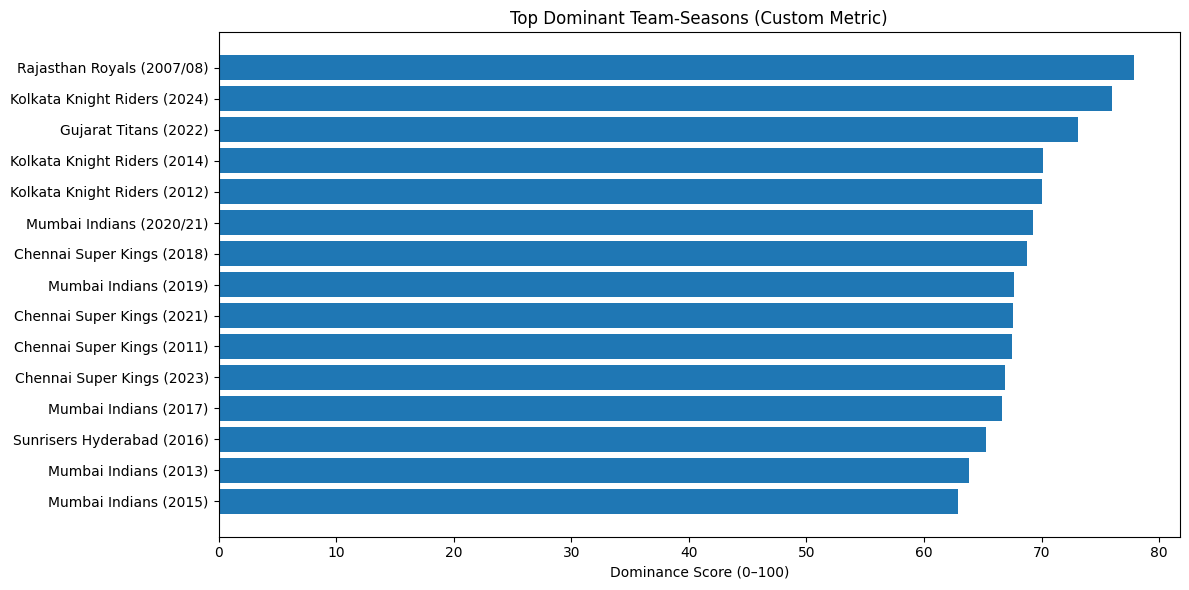

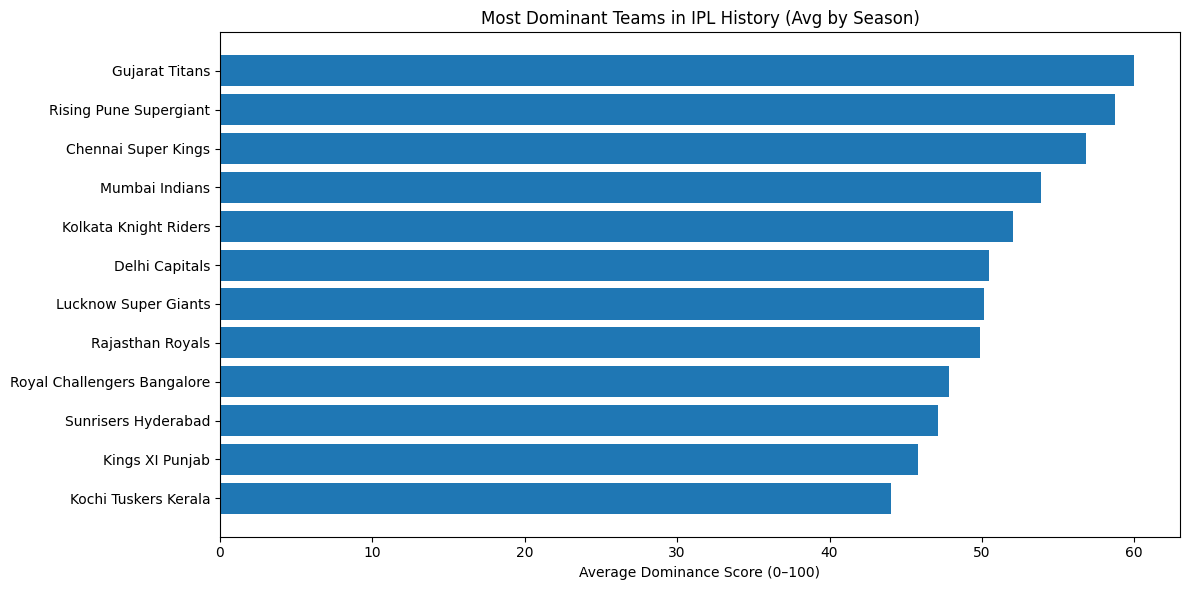

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
file_path = "/mnt/data/matches (1).csv"
matches = pd.read_csv("/content/matches (1).csv")

# Convert date column
matches['date'] = pd.to_datetime(matches['date'], errors='coerce')

# --- Stage classification ---
def classify_stage(mt):
    if pd.isna(mt):
        return "League"
    mt_low = str(mt).lower()
    if "final" in mt_low:
        return "Final"
    if "qualifier" in mt_low or "eliminator" in mt_low or "knockout" in mt_low or "semi" in mt_low or "playoff" in mt_low:
        return "Playoff"
    return "League"

matches['stage'] = matches['match_type'].apply(classify_stage)

# --- Expand into team-rows ---
def build_team_rows(row):
    base = {
        'season': row['season'],
        'date': row['date'],
        'stage': row['stage'],
        'match_id': row['id'],
        'super_over': str(row.get('super_over', 'N')).strip().upper() in ['Y','YES','TRUE','T','1']
    }

    result = str(row.get('result', '')).strip().lower()
    margin = row.get('result_margin', np.nan)
    target_runs = row.get('target_runs', np.nan)

    # Normalized margin
    if result == 'runs' and pd.notna(margin):
        denom = target_runs if pd.notna(target_runs) and target_runs > 0 else 150.0
        norm = min(float(margin) / float(denom), 1.0)
    elif result == 'wickets' and pd.notna(margin):
        norm = min(float(margin) / 10.0, 1.0)
    else:
        norm = 0.05 if str(row.get('winner', '')) in [row.get('team1',''), row.get('team2','')] else 0.0

    # Stage weights
    if row['stage'] == 'Final':
        weight = 1.5
    elif row['stage'] == 'Playoff':
        weight = 1.25
    else:
        weight = 1.0

    winner = row.get('winner', None)
    t1, t2 = row['team1'], row['team2']

    rows = []
    for team in [t1, t2]:
        r = base.copy()
        r['team'] = team
        if pd.isna(winner) or winner == '' or winner == 'No Result':
            r['win'] = 0
            r['loss'] = 0
            r['signed_margin'] = 0.0
            r['weight'] = 0.0
            r['is_playoff'] = 1 if row['stage'] in ['Playoff','Final'] else 0
            r['playoff_win'] = 0
        else:
            if team == winner:
                r['win'] = 1
                r['loss'] = 0
                r['signed_margin'] = +norm
                r['weight'] = weight
                r['is_playoff'] = 1 if row['stage'] in ['Playoff','Final'] else 0
                r['playoff_win'] = r['is_playoff']
            else:
                r['win'] = 0
                r['loss'] = 1
                r['signed_margin'] = -norm
                r['weight'] = weight
                r['is_playoff'] = 1 if row['stage'] in ['Playoff','Final'] else 0
                r['playoff_win'] = 0
        rows.append(r)
    return rows

team_rows = []
for _, row in matches.iterrows():
    team_rows.extend(build_team_rows(row))
team_df = pd.DataFrame(team_rows)

# --- Aggregate season stats ---
def season_agg(g):
    g_eff = g[g['weight'] > 0]
    matches_played = len(g_eff)
    wins = g_eff['win'].sum()
    losses = g_eff['loss'].sum()
    win_pct = wins / matches_played if matches_played > 0 else np.nan

    if matches_played > 0:
        avg_signed_margin = np.average(g_eff['signed_margin'], weights=g_eff['weight'])
    else:
        avg_signed_margin = np.nan

    playoff_matches = g_eff['is_playoff'].sum()
    playoff_wins = g_eff['playoff_win'].sum()
    playoff_win_rate = playoff_wins / playoff_matches if playoff_matches > 0 else np.nan

    margin_rescaled = (avg_signed_margin + 1) / 2.0 if pd.notna(avg_signed_margin) else np.nan

    # Dominance Score
    pwr = playoff_win_rate if pd.notna(playoff_win_rate) else win_pct
    dominance = 100.0 * (0.6 * (win_pct if pd.notna(win_pct) else 0) +
                         0.3 * (margin_rescaled if pd.notna(margin_rescaled) else 0) +
                         0.1 * (pwr if pd.notna(pwr) else 0))

    return pd.Series({
        'matches': matches_played,
        'wins': wins,
        'losses': losses,
        'win_pct': win_pct,
        'avg_signed_margin': avg_signed_margin,
        'margin_rescaled_0_1': margin_rescaled,
        'playoff_matches': playoff_matches,
        'playoff_wins': playoff_wins,
        'playoff_win_rate': playoff_win_rate,
        'DominanceScore': dominance
    })

season_table = team_df.groupby(['season','team']).apply(season_agg).reset_index()

# --- Top dominant seasons ---
top_team_seasons = season_table.sort_values(['DominanceScore','wins','margin_rescaled_0_1'], ascending=False).head(15)

# --- All-time averages ---
team_alltime = (season_table
                .dropna(subset=['matches'])
                .assign(weight=lambda d: d['matches'])
                .groupby('team')
                .apply(lambda g: pd.Series({
                    'seasons': g['season'].nunique(),
                    'total_matches': g['matches'].sum(),
                    'avg_dominance': np.average(g['DominanceScore'], weights=g['matches']),
                    'best_season': g.loc[g['DominanceScore'].idxmax(), 'season'],
                    'best_season_score': g['DominanceScore'].max()
                }))
                .reset_index()
               )
top_teams_alltime = team_alltime.sort_values(['avg_dominance','total_matches'], ascending=False).head(12)

# --- Charts ---
# Top team-seasons
plt.figure(figsize=(12,6))
labels = [f"{r.team} ({r.season})" for _, r in top_team_seasons.iterrows()]
scores = top_team_seasons['DominanceScore'].values
plt.barh(range(len(labels)), scores)
plt.yticks(range(len(labels)), labels)
plt.xlabel("Dominance Score (0–100)")
plt.title("Top Dominant Team-Seasons (Custom Metric)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# All-time dominant teams
plt.figure(figsize=(12,6))
labels2 = list(top_teams_alltime['team'])
scores2 = top_teams_alltime['avg_dominance'].values
plt.barh(range(len(labels2)), scores2)
plt.yticks(range(len(labels2)), labels2)
plt.xlabel("Average Dominance Score (0–100)")
plt.title("Most Dominant Teams in IPL History (Avg by Season)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# --- Save outputs ---
top_team_seasons.to_csv("top_dominant_team_seasons.csv", index=False)
team_alltime.to_csv("most_dominant_teams_alltime.csv", index=False)
